In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from skimage import io, util
# import filters form scipy
from scipy.ndimage import uniform_filter, median_filter


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
img = io.imread('eight.tif')  

#Convert the image to a floating point type 
img = util.img_as_float(img)


# Q 3.1
# add salt and pepper noise
noisy_sp = util.random_noise(img, mode='s&p')  
# add gaussian noise
noisy_gauss = util.random_noise(img, mode='gaussian') 

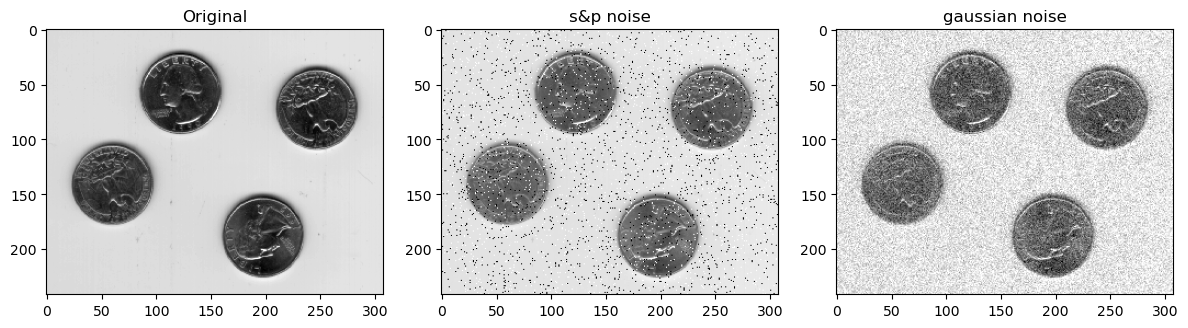

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(noisy_sp, cmap='gray')
axes[1].set_title("s&p noise")

axes[2].imshow(noisy_gauss, cmap='gray')
axes[2].set_title("gaussian noise")

plt.tight_layout()
plt.savefig("a2-3.1-1.png", dpi=300, bbox_inches='tight')
plt.show()

In [289]:
time_mean_sp = []
time_median_sp = []

time_mean_gauss = []
time_median_gauss = []

In [291]:
kernel_sizes = range(1, 26) # kernel size N range 1-25
runs = 100  # the number of executions
for N in kernel_sizes:
    total_time = timeit.timeit(lambda: uniform_filter(noisy_sp, size=N), number=runs)
    time_mean_sp.append(total_time/ runs)

    total_time = timeit.timeit(lambda: uniform_filter(noisy_gauss, size=N), number=runs)
    time_mean_gauss.append(total_time/ runs)

    total_time = timeit.timeit(lambda: median_filter(noisy_sp, size=N), number=runs)
    time_median_sp.append(total_time/ runs)

    total_time = timeit.timeit(lambda: median_filter(noisy_gauss, size=N), number=runs)
    time_median_gauss.append(total_time/ runs)

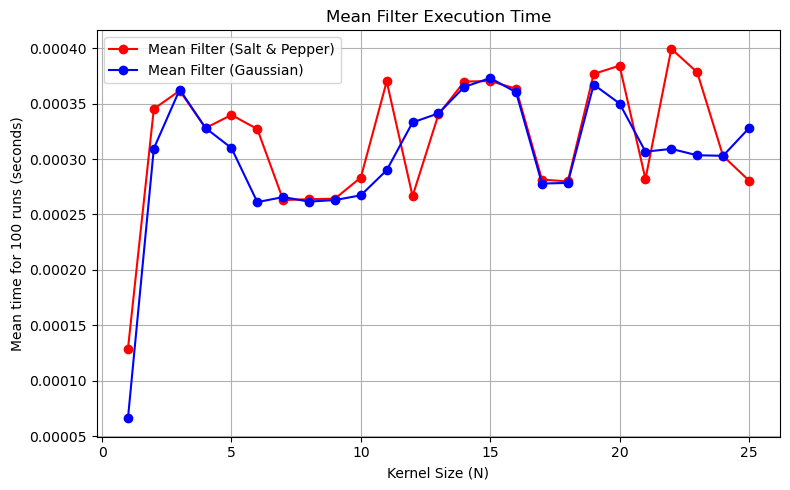

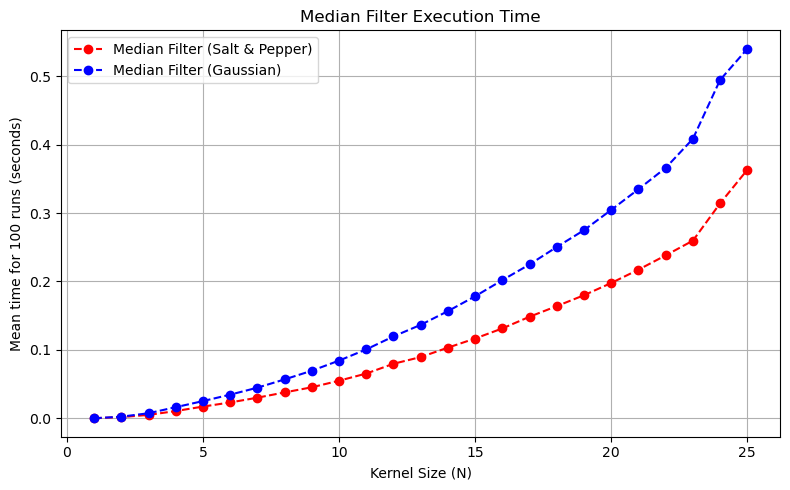

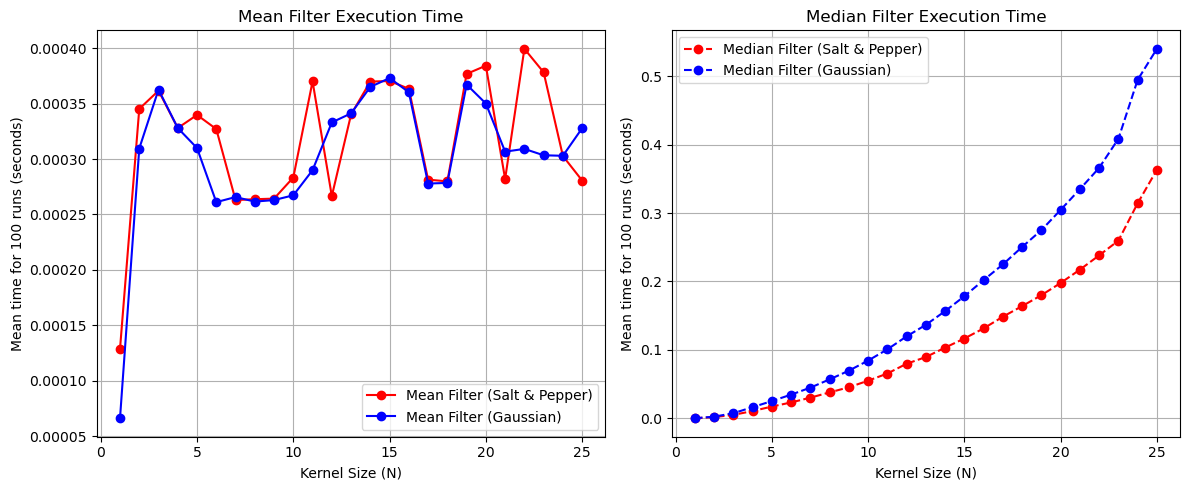

In [335]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#  Mean Filter time comparison (Salt & Pepper vs Gaussian)
axes[0].plot(kernel_sizes, time_mean_sp, 'r-o', label="Mean Filter (Salt & Pepper)")
axes[0].plot(kernel_sizes, time_mean_gauss, 'b-o', label="Mean Filter (Gaussian)")
axes[0].set_xlabel("Kernel Size (N)")
axes[0].set_ylabel(f"Mean time for {n_runs} runs (seconds)")
axes[0].set_title("Mean Filter Execution Time")
axes[0].legend()
axes[0].grid(True)

# Median Filter time comparison (Salt & Pepper vs Gaussian)
axes[1].plot(kernel_sizes, time_median_sp, 'r--o', label="Median Filter (Salt & Pepper)")
axes[1].plot(kernel_sizes, time_median_gauss, 'b--o', label="Median Filter (Gaussian)")
axes[1].set_xlabel("Kernel Size (N)")
axes[1].set_ylabel(f"Mean time for {n_runs} runs (seconds)")
axes[1].set_title("Median Filter Execution Time")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig("a2-3.1-2.png", dpi=300, bbox_inches='tight')
plt.show()

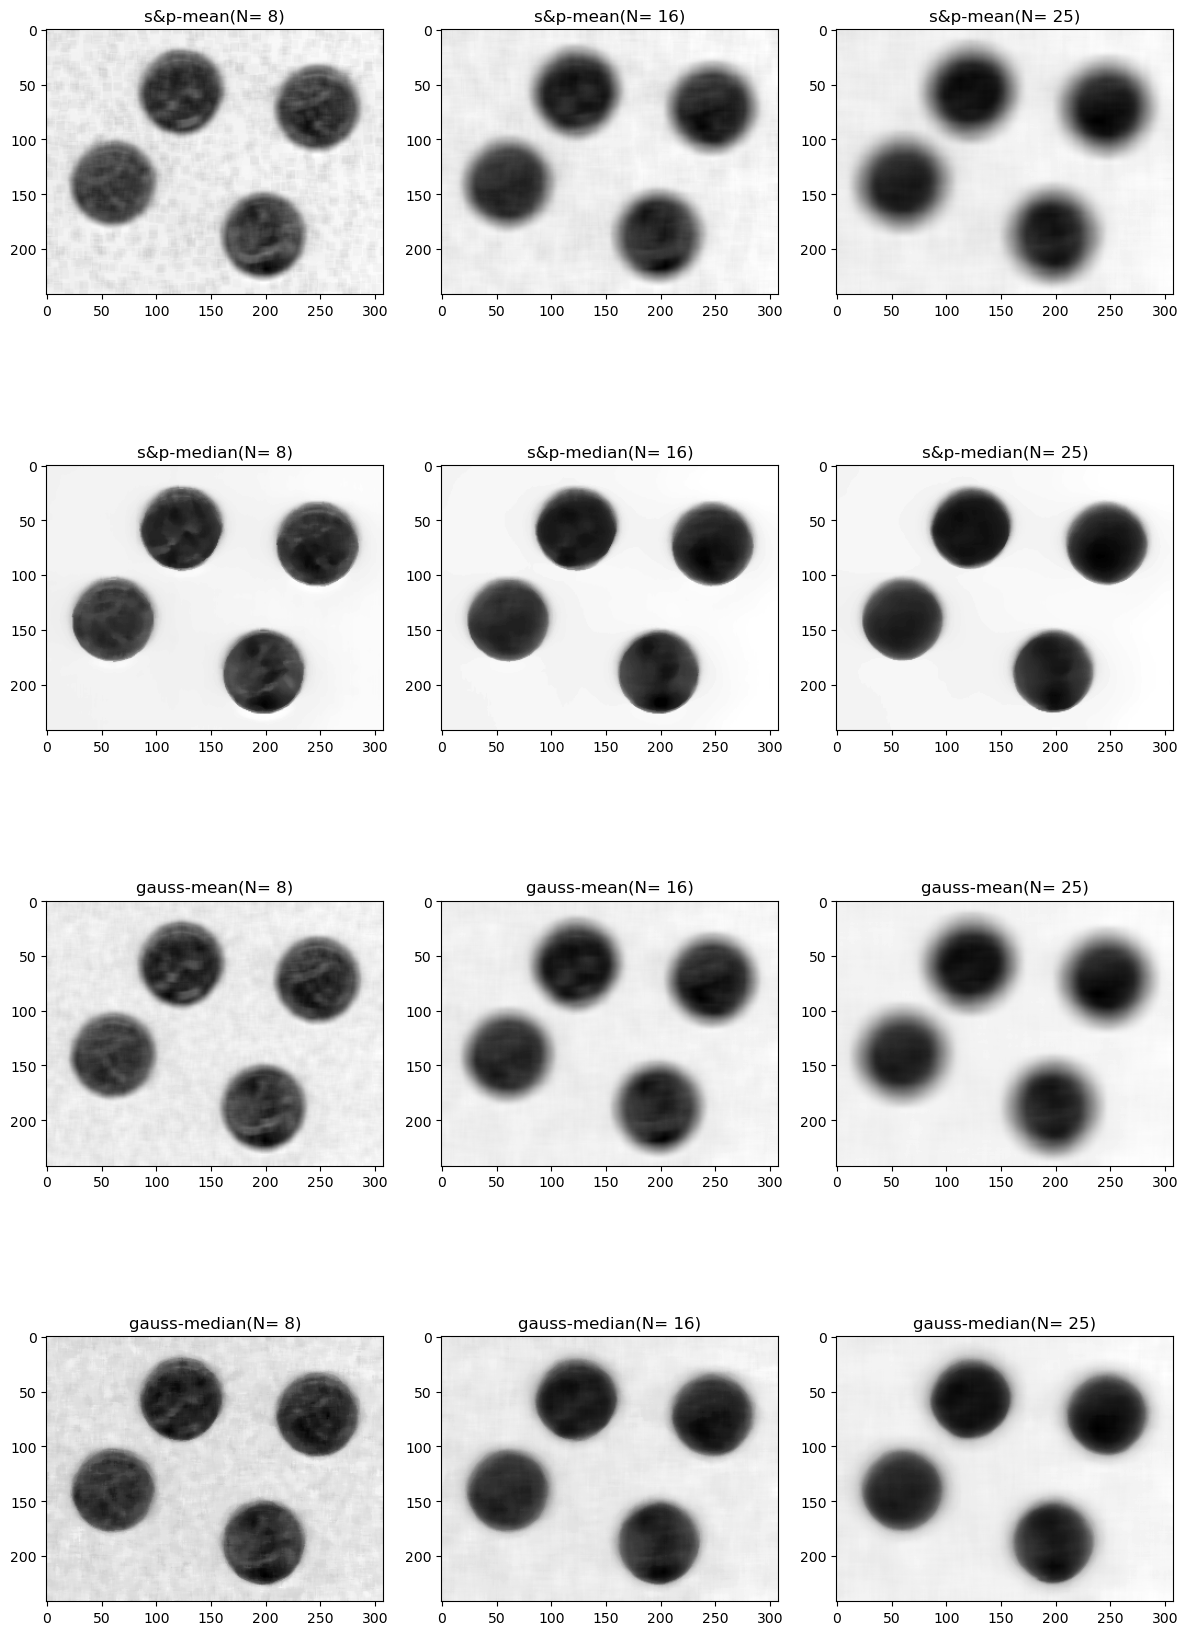

In [337]:
fig, axes = plt.subplots(4, 3, figsize=(12,18))

# SP image
axes[0,0].imshow(uniform_filter(noisy_sp, 8),cmap='gray')
axes[0,0].set_title(f"s&p-mean(N= 8)")

axes[0,1].imshow(uniform_filter(noisy_sp, 16),cmap='gray')
axes[0,1].set_title(f"s&p-mean(N= 16)")

axes[0,2].imshow(uniform_filter(noisy_sp, 25),cmap='gray')
axes[0,2].set_title(f"s&p-mean(N= 25)")

axes[1,0].imshow(median_filter(noisy_sp, 8),cmap='gray')
axes[1,0].set_title(f"s&p-median(N= 8)")

axes[1,1].imshow(median_filter(noisy_sp, 16),cmap='gray')
axes[1,1].set_title(f"s&p-median(N= 16)")

axes[1,2].imshow(median_filter(noisy_sp, 25),cmap='gray')
axes[1,2].set_title(f"s&p-median(N= 25)")


# Gauss image

axes[2,0].imshow(uniform_filter(noisy_gauss, 8),cmap='gray')
axes[2,0].set_title(f"gauss-mean(N= 8)")

axes[2,1].imshow(uniform_filter(noisy_gauss, 16),cmap='gray')
axes[2,1].set_title(f"gauss-mean(N= 16)")

axes[2,2].imshow(uniform_filter(noisy_gauss, 25),cmap='gray')
axes[2,2].set_title(f"gauss-mean(N= 25)")

axes[3,0].imshow(median_filter(noisy_gauss, 8),cmap='gray')
axes[3,0].set_title(f"gauss-median(N= 8)")

axes[3,1].imshow(median_filter(noisy_gauss, 16),cmap='gray')
axes[3,1].set_title(f"gauss-median(N= 16)")

axes[3,2].imshow(median_filter(noisy_gauss, 25),cmap='gray')
axes[3,2].set_title(f"gauss-median(N= 25)")

plt.tight_layout()
plt.savefig("a2-3.1-3.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
import cv2

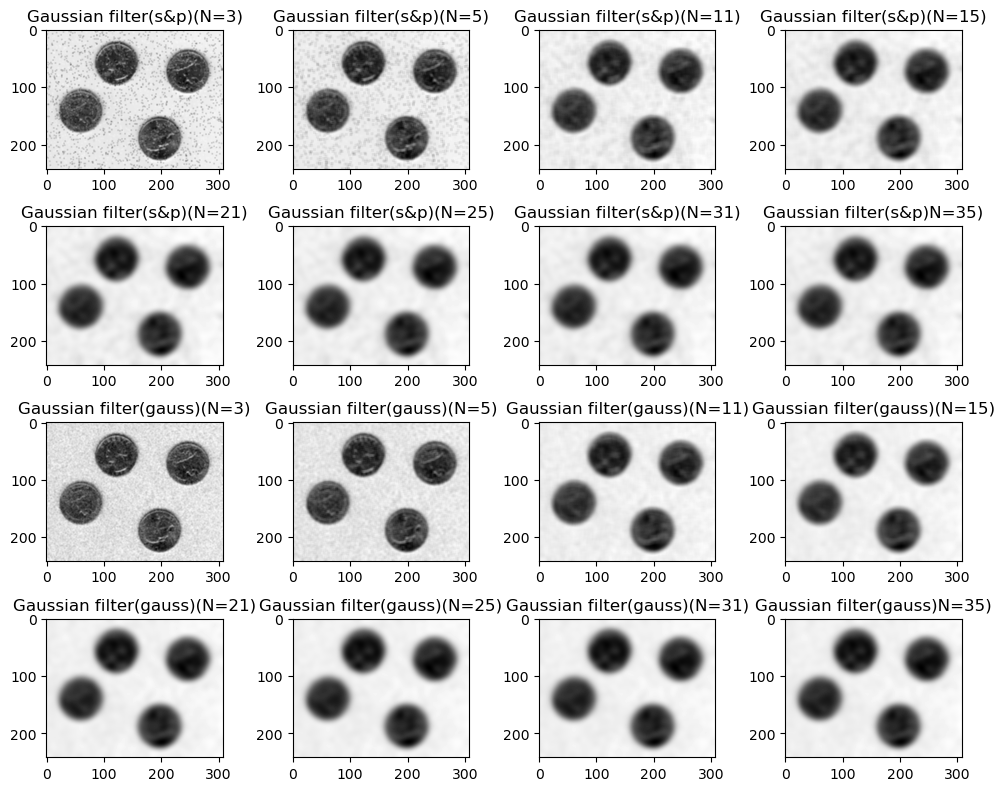

In [29]:
fig, axes = plt.subplots(4, 4, figsize=(10,8))
img = io.imread('eight.tif') 

#Q 3.2
# Use the Gaussian filter from the OpenCV package and set the range of N to [3,5,11,15,21,25,31,35]

axes[0,0].imshow(cv2.GaussianBlur(noisy_sp, (3, 3), 5),cmap='gray')
axes[0,0].set_title(f"Gaussian filter(s&p)(N=3)")

axes[0,1].imshow(cv2.GaussianBlur(noisy_sp, (5, 5), 5),cmap='gray')
axes[0,1].set_title(f"Gaussian filter(s&p)(N=5)")

axes[0,2].imshow(cv2.GaussianBlur(noisy_sp, (11, 11), 5),cmap='gray')
axes[0,2].set_title(f"Gaussian filter(s&p)(N=11)")

axes[0,3].imshow(cv2.GaussianBlur(noisy_sp, (15, 15), 5),cmap='gray')
axes[0,3].set_title(f"Gaussian filter(s&p)(N=15)")

axes[1,0].imshow(cv2.GaussianBlur(noisy_sp, (21, 21), 5),cmap='gray')
axes[1,0].set_title(f"Gaussian filter(s&p)(N=21)")

axes[1,1].imshow(cv2.GaussianBlur(noisy_sp, (25, 25), 5),cmap='gray')
axes[1,1].set_title(f"Gaussian filter(s&p)(N=25)")

axes[1,2].imshow(cv2.GaussianBlur(noisy_sp, (31, 31), 5),cmap='gray')
axes[1,2].set_title(f"Gaussian filter(s&p)(N=31)")

axes[1,3].imshow(cv2.GaussianBlur(noisy_sp, (35, 35), 5),cmap='gray')
axes[1,3].set_title(f"Gaussian filter(s&p)N=35)")



axes[2,0].imshow(cv2.GaussianBlur(noisy_gauss, (3, 3), 5),cmap='gray')
axes[2,0].set_title(f"Gaussian filter(gauss)(N=3)")

axes[2,1].imshow(cv2.GaussianBlur(noisy_gauss, (5, 5), 5),cmap='gray')
axes[2,1].set_title(f"Gaussian filter(gauss)(N=5)")

axes[2,2].imshow(cv2.GaussianBlur(noisy_gauss, (11, 11), 5),cmap='gray')
axes[2,2].set_title(f"Gaussian filter(gauss)(N=11)")

axes[2,3].imshow(cv2.GaussianBlur(noisy_gauss, (15, 15), 5),cmap='gray')
axes[2,3].set_title(f"Gaussian filter(gauss)(N=15)")

axes[3,0].imshow(cv2.GaussianBlur(noisy_gauss, (21, 21), 5),cmap='gray')
axes[3,0].set_title(f"Gaussian filter(gauss)(N=21)")

axes[3,1].imshow(cv2.GaussianBlur(noisy_gauss, (25, 25), 5),cmap='gray')
axes[3,1].set_title(f"Gaussian filter(gauss)(N=25)")

axes[3,2].imshow(cv2.GaussianBlur(noisy_gauss, (31, 31), 5),cmap='gray')
axes[3,2].set_title(f"Gaussian filter(gauss)(N=31)")

axes[3,3].imshow(cv2.GaussianBlur(noisy_gauss, (35, 35), 5),cmap='gray')
axes[3,3].set_title(f"Gaussian filter(gauss)N=35)")


plt.tight_layout()
plt.savefig("a2-3.2.png", dpi=300, bbox_inches='tight')
plt.show()

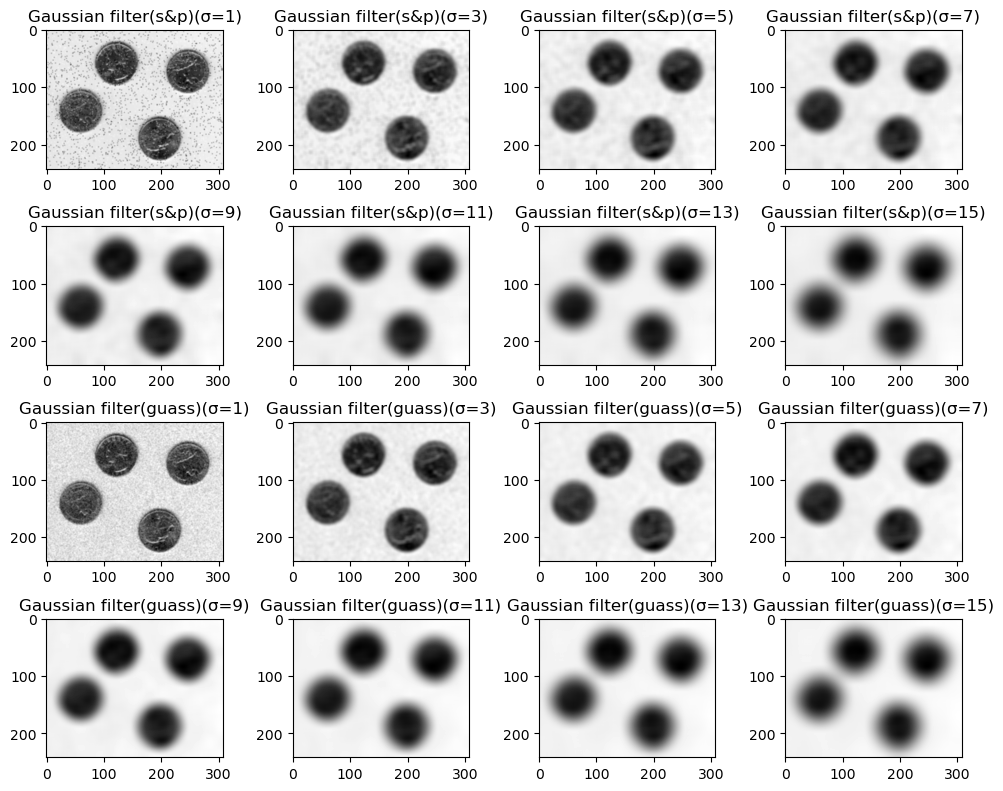

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(10,8))
img = io.imread('eight.tif') 
img = util.random_noise(img, mode='gaussian')  

#Q 3.3
# Use the Gaussian filter from the OpenCV package and set the range of σ to [1,3,5,7,9,11,13,15]

axes[0,0].imshow(cv2.GaussianBlur(noisy_sp, (3, 3), 1),cmap='gray')
axes[0,0].set_title(f"Gaussian filter(s&p)(σ=1)")

axes[0,1].imshow(cv2.GaussianBlur(noisy_sp, (9, 9), 3),cmap='gray')
axes[0,1].set_title(f"Gaussian filter(s&p)(σ=3)")

axes[0,2].imshow(cv2.GaussianBlur(noisy_sp, (15, 15), 5),cmap='gray')
axes[0,2].set_title(f"Gaussian filter(s&p)(σ=5)")

axes[0,3].imshow(cv2.GaussianBlur(noisy_sp, (21, 21), 7),cmap='gray')
axes[0,3].set_title(f"Gaussian filter(s&p)(σ=7)")

axes[1,0].imshow(cv2.GaussianBlur(noisy_sp, (27, 27), 9),cmap='gray')
axes[1,0].set_title(f"Gaussian filter(s&p)(σ=9)")

axes[1,1].imshow(cv2.GaussianBlur(noisy_sp, (33, 33), 11),cmap='gray')
axes[1,1].set_title(f"Gaussian filter(s&p)(σ=11)")

axes[1,2].imshow(cv2.GaussianBlur(noisy_sp, (39, 39), 13),cmap='gray')
axes[1,2].set_title(f"Gaussian filter(s&p)(σ=13)")

axes[1,3].imshow(cv2.GaussianBlur(noisy_sp, (45, 45), 15),cmap='gray')
axes[1,3].set_title(f"Gaussian filter(s&p)(σ=15)")

axes[2,0].imshow(cv2.GaussianBlur(noisy_gauss, (3, 3), 1),cmap='gray')
axes[2,0].set_title(f"Gaussian filter(guass)(σ=1)")

axes[2,1].imshow(cv2.GaussianBlur(noisy_gauss, (9, 9), 3),cmap='gray')
axes[2,1].set_title(f"Gaussian filter(guass)(σ=3)")

axes[2,2].imshow(cv2.GaussianBlur(noisy_gauss, (15, 15), 5),cmap='gray')
axes[2,2].set_title(f"Gaussian filter(guass)(σ=5)")

axes[2,3].imshow(cv2.GaussianBlur(noisy_gauss, (21, 21), 7),cmap='gray')
axes[2,3].set_title(f"Gaussian filter(guass)(σ=7)")

axes[3,0].imshow(cv2.GaussianBlur(noisy_gauss, (27, 27), 9),cmap='gray')
axes[3,0].set_title(f"Gaussian filter(guass)(σ=9)")

axes[3,1].imshow(cv2.GaussianBlur(noisy_gauss, (33, 33), 11),cmap='gray')
axes[3,1].set_title(f"Gaussian filter(guass)(σ=11)")

axes[3,2].imshow(cv2.GaussianBlur(noisy_gauss, (39, 39), 13),cmap='gray')
axes[3,2].set_title(f"Gaussian filter(guass)(σ=13)")

axes[3,3].imshow(cv2.GaussianBlur(noisy_gauss, (45, 45), 15),cmap='gray')
axes[3,3].set_title(f"Gaussian filter(guass)(σ=15)")

plt.tight_layout()
plt.savefig("a2-3.3.png", dpi=300, bbox_inches='tight')
plt.show()